In [20]:
!gdown 1-UOH6I1CJ3cZ8aijfY2hfwpEpEeuD5d6
!gdown 17ZmBZPWN0DxiJn-Uonv7QvHOwzVHyhl1
!gdown 1KGsckY5l6Sfd5nfE992VclRrzfSyAsbZ

Downloading...
From: https://drive.google.com/uc?id=1-UOH6I1CJ3cZ8aijfY2hfwpEpEeuD5d6
To: /content/X_train.txt
100% 66.0M/66.0M [00:00<00:00, 200MB/s]
Downloading...
From: https://drive.google.com/uc?id=17ZmBZPWN0DxiJn-Uonv7QvHOwzVHyhl1
To: /content/y_train.txt
100% 14.7k/14.7k [00:00<00:00, 33.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KGsckY5l6Sfd5nfE992VclRrzfSyAsbZ
To: /content/activity_labels.txt
100% 80.0/80.0 [00:00<00:00, 289kB/s]


Загрузите данные из источника по ссылке. Нам нужен файл X_train.txt (там будет чуть более 7 тысяч наблюдений). Чтобы подгрузить этот файл, можно воспользоваться функцией loadtxt библиотеки numpy.

Ознакомьтесь с данными:

выведите количество признаков;

есть ли в данных пропуски;

отличаются ли различные признаки по масштабу.

  Понизьте размерность данных:

воспользуйтесь методом порога отклонения, чтобы избавиться от наблюдений, вариативность по которым низка. Удалите не более 10 % признаков;

воспользуйтесь методом PCA:

приведите признаки к одинаковому масштабу,

визуализируйте зависимость степени объяснения дисперсии исходных данных от количества выделяемых главных компонент,

определите минимальное необходимое количество главных компонент,  при которых объяснение дисперсии исходных данных будет достаточно велико (хотя бы 90 %),

выделите первые две главные компоненты и с помощью визуализации убедитесь, что новые признаки позволяют неплохо отделить данные друг от друга.

Подберите оптимальное число кластеров: 

воспользуйтесь методом локтя, чтобы оценить, как варьируется значение целевой функции кластеризации в зависимости от количества кластеров, на которые мы делим данные;

выберите оптимальное количество кластеров и объясните свой выбор;

повторите визуализацию данных по первым двум главным компонентам, размечая наблюдения каждого кластера своим цветом.

Оцените качество кластеризации:

подгрузите реальные метки наблюдений из файла y_train.txt, а также их значения из файла activity_labels.txt;

определите, насколько логична полученная кластеризация. Можно, например, сформировать сводную таблицу, где в строках будут реальные активности, а в столбцах — лейблы, полученные согласно кластеризации;

сделайте выводы, опишите, почему те или иные виды активности могли объединиться в один кластер, а другие отделиться от них.

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

In [29]:
data = np.loadtxt('X_train.txt')
target = np.loadtxt('y_train.txt')
df = pd.DataFrame(data)

In [34]:
true_labels = []
with open('activity_labels.txt','r') as file:
  for line in file:
    true_labels.append(line.split())
true_labels = dict(true_labels)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


-1.0
1.0


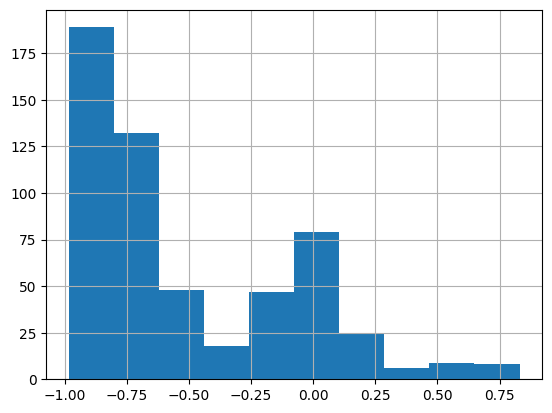

In [6]:
print(f'{min(df.min())}')
print(f'{max(df.max())}')
df.mean().hist();

Пропусков нет, данные распределены в диапазоне от -1 до 1

In [105]:
selector = VarianceThreshold(threshold=0.0125)
X_high_variance = selector.fit_transform(data)
X_high_variance.shape

(7352, 509)

Удалил не более 10 % признаков, вариативность по которым низка

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_high_variance)

Стандартизируем данные по среднему значению и стандартному отклонению

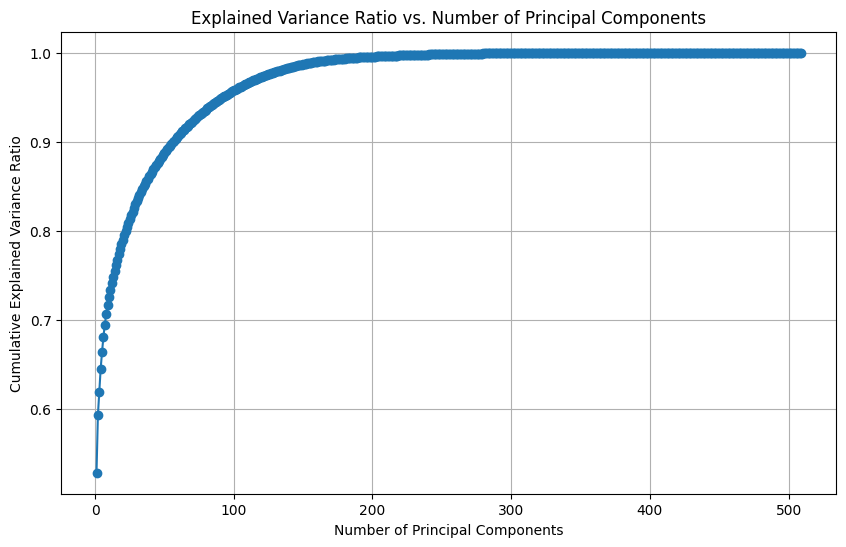

In [9]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [10]:
min_components = np.argmax(explained_variance_ratio_cumulative >= 0.9) + 1
print(f"Минимальное количество главных компонент для объяснения 90% дисперсии: {min_components}")

Минимальное количество главных компонент для объяснения 90% дисперсии: 57


In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,...,499,500,501,502,503,504,505,506,507,508
0,0.058078,0.058828,0.056258,0.057811,0.058302,0.055815,0.057796,0.056668,0.055041,-0.058136,...,-0.006035,0.012861,0.010665,-0.001637,-0.001205,0.000903,-0.001557,-0.024098,0.031042,0.027724
1,-0.005301,-0.020695,-0.028980,-0.003876,-0.023612,-0.033096,-0.005348,-0.021497,-0.023072,0.005775,...,0.075677,-0.016381,-0.011780,-0.006125,-0.003661,0.012361,-0.009573,0.018047,-0.036944,-0.017484


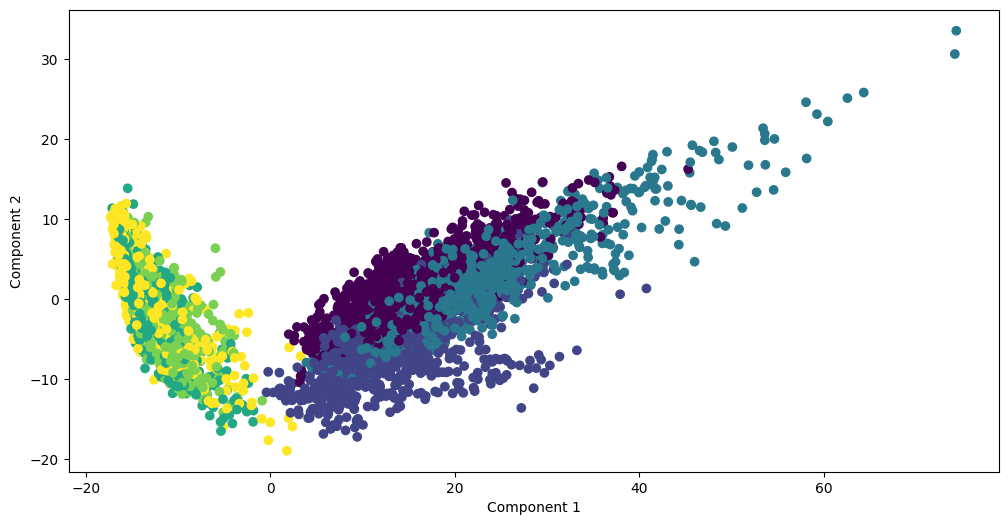

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target);
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

В некоторой степени можно полагать, что данные распределены по двум векторам корректно, т.к. точки принадлежащие одному классу находятся близко друг к другу


In [13]:
distortion = []
K = range(1, 10)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    distortion.append(model.inertia_)

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 1/9 [00:01<00:08,  1.08s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 22%|██▏       | 2/9 [00:04<00:15,  2.23s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 33%|███▎      | 3/9 [00:07<00:17,  2.96s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

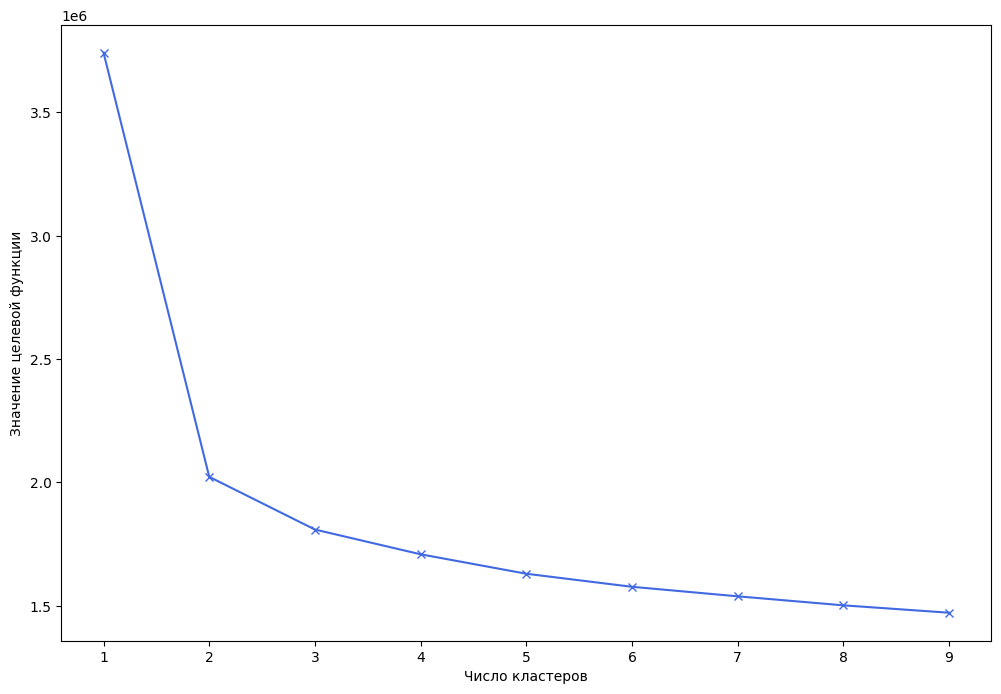

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, c='royalblue', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

По правилу локтя оптимальное значение кластерова равно 2

In [15]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(X_scaled);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


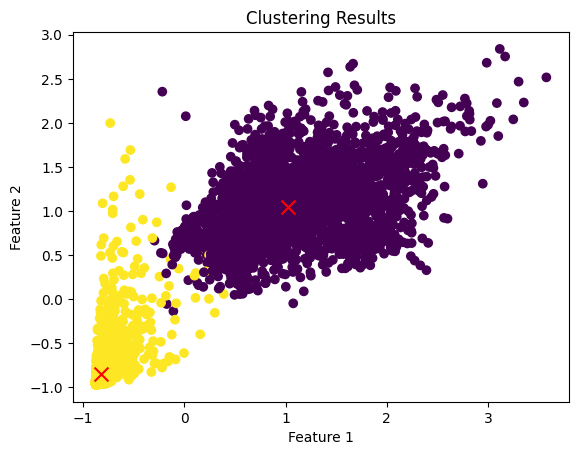

In [89]:
labels = model.labels_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', color='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.show()

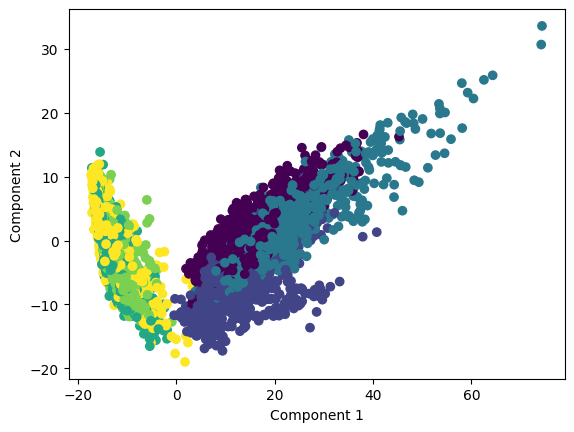

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target);
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Метод гланых компонент разложил все пространство признаков на два вектора, в то время как кластеризация выведена для первых двух векторов. Тем не менее, распределение выборки пополам видно на обоих выборках

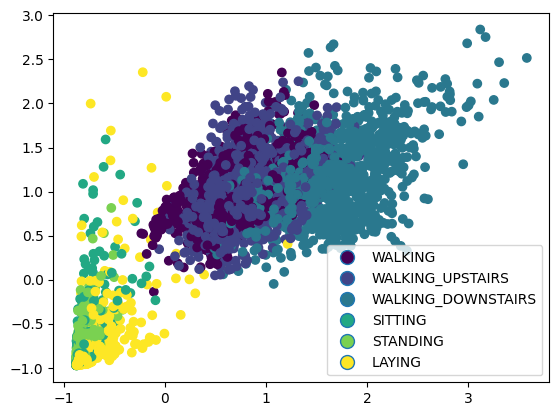

In [81]:
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=target, cmap='viridis')
legend1_line2d = []
for class_value in np.unique(target):
    legend1_line2d.append(
        plt.Line2D([0], [0],
                   linestyle='none',
                   marker='o',
                   markersize=10,
                   markerfacecolor=plt.cm.viridis((class_value - 1) / 5)))
plt.legend(legend1_line2d,
           [true_labels[str(int(class_value))] for class_value in np.unique(target)],
           numpoints=1)
plt.show()

In [101]:
df = pd.DataFrame({'real_activity': target, 'cluster_label': labels})
df['real_activity'] = df['real_activity'].apply(lambda x: true_labels[str(int(x))])
pivot_table = pd.pivot_table(df, index='real_activity', columns='cluster_label', aggfunc=len, fill_value=0)
print(pivot_table)

cluster_label          0     1
real_activity                 
LAYING                11  1396
SITTING                1  1285
STANDING               0  1374
WALKING             1226     0
WALKING_DOWNSTAIRS   986     0
WALKING_UPSTAIRS    1068     5


С помощью метода класетризации K-means удалось отделить стационарные активности от подвижных, предположительно из-за разных нагрузок на организм